# Credit Scoring

First, I prepare the dataset so that it can be processed, for example encode categorical data and streamline the dataset so that all necessary parameters are present. Then I compute credit scores by scaling the data,  applying weights, calculating the sum of each weighted parameter and scaling it to the range between 300 and 850.

0. Import Libraries and do general settings

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [2]:
creditscoring = pd.read_excel(r"C:\Users\felis\Github_DataScience\BMW_Portfolio\dataset.xlsx")

1. Data Preparation

1.1. Encoding

First, I need to transform all categorical data into numerical data. I use the Label Encoder.

In [4]:
# Label Encoder
encoder = LabelEncoder() 

In [5]:
creditscoring["paymenthistory"] = encoder.fit_transform(creditscoring["paymenthistory"])

In [6]:
creditscoring["newcredit"] = encoder.fit_transform(creditscoring["newcredit"])

1.2. Create variable amountsowed

In [7]:
creditscoring["amountsowed"] = creditscoring["creditused"] / creditscoring["creditavailable"]

In [8]:
creditscoring.drop("creditused", axis=1, inplace=True)

In [9]:
creditscoring.drop("creditavailable", axis=1, inplace=True)

In [10]:
creditscoring.drop(["ID", "Age", "City", "Gender"], axis=1, inplace=True)

In [11]:
for i, value in enumerate(creditscoring):
    if creditscoring[value].isna().any():
        creditscoring[value].fillna(0, inplace=True)

1.3. Divide dataset into subsets according to [1,0] of paymenthistory 

This division is necessary to be able to scale it (scaling does not manage missing values well). The subsets are rejoined later on.

In [12]:
subset1 = creditscoring[creditscoring['paymenthistory'] == 1]
subset2 = creditscoring[creditscoring['paymenthistory'] == 0]

In [13]:
subset1.drop(columns = ["paymenthistory"], axis = 1, inplace = True)

C:\Users\felis\AppData\Local\Temp\ipykernel_26280\490436847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset1.drop(columns = ["paymenthistory"], axis = 1, inplace = True)


In [14]:
subset2.drop(columns = ["nolatepayment", "timelatepayment"], axis = 1, inplace = True)

C:\Users\felis\AppData\Local\Temp\ipykernel_26280\2421970458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset2.drop(columns = ["nolatepayment", "timelatepayment"], axis = 1, inplace = True)


1.4. Scale Data

In [15]:
scaler = MinMaxScaler(feature_range=(-1, 1)) # MinMaxScaler instead of StandardScaler to avoid 0 values
subset1 = scaler.fit_transform(subset1)
subset2 = scaler.fit_transform(subset2)

In [16]:
subset1 = pd.DataFrame(subset1)
subset2 = pd.DataFrame(subset2)

In [17]:
subset1.rename(columns={
    0: "nolatepayment",
    1: "timelatepayment",
    2: "lengthcredithistory",
    3: "creditmix",
    4: "newcredit",
    5: "amountsowned"
}, inplace=True)

In [18]:
subset2.rename(columns={
    0: "paymenthistory",
    1: "lengthcredithistory",
    2: "creditmix",
    3: "newcredit",
    4: "amountsowned"
}, inplace=True)

In [20]:
subset1.head()

,nolatepayment,timelatepayment,lengthcredithistory,creditmix,newcredit,amountsowned
0,-1.0,-1.0,-0.573544,1.0,1.0,0.644136
1,-1.0,-1.0,-1.000000,-1.0,1.0,-1.000000
2,-1.0,-1.0,-0.368085,1.0,1.0,0.739598
3,-1.0,-1.0,-0.600632,-0.5,-1.0,0.095730
4,-1.0,-1.0,-0.617282,-0.5,-1.0,-0.712458


In [21]:
subset2.head()

,paymenthistory,lengthcredithistory,creditmix,newcredit,amountsowned
0,-1.0,-0.431639,0.0,1.0,0.389039
1,-1.0,-0.577221,1.0,1.0,0.087354
2,-1.0,-0.708405,0.5,-1.0,-0.412595
3,-1.0,-0.226672,0.0,1.0,0.165476
4,-1.0,-0.927189,-0.5,1.0,-0.677396


2.  Credit Scores

https://www.investopedia.com/terms/c/credit_score.asp

The three major credit reporting agencies in the U.S. (Equifax, Experian, and TransUnion) report, update, and store consumers’ credit histories. While there can be differences in the information collected by the three credit bureaus, five main factors are evaluated when calculating a credit score:3

    Payment history (35%)
    Amounts owed (30%)
    Length of credit history (15%)
    Types of credit (10%)
    New credit (10%)

Payment history: Your payment history includes whether you've paid your bills on time. It takes into account how many late payments you've had, and how late they were.
    
Amounts owed: Amounts owed is the percentage of credit you've used compared to the credit available to you, which is known as credit utilization.

Length of credit history: Longer credit histories are considered less risky, as there is more data to determine payment history.

Credit mix: A variety of credit types shows lenders you can manage various types of credit. It can include installment credit, such as car loans or mortgage loans, and revolving credit, such as credit cards.

New credit: Lenders view new credit as a potential sign you may be desperate for credit. Too many recent applications for credit can negatively affect your credit score.


2.1. Apply weights

In [22]:
# Define the weight vector
weights_subset1 = [0.175, 0.175, 0.3, 0.15, 0.1, 0.1]
weights_subset2 = [0.35, 0.3, 0.15, 0.1, 0.1]

# Apply the weights to each column
weighted_creditscoring_subset1 = subset1 * weights_subset1
weighted_creditscoring_subset2 = subset2 * weights_subset2

In [23]:
weighted_creditscoring_subset1

,nolatepayment,timelatepayment,lengthcredithistory,creditmix,newcredit,amountsowned
0,-0.175,-0.175,-0.172063,0.150,0.1,0.064414
1,-0.175,-0.175,-0.300000,-0.150,0.1,-0.100000
2,-0.175,-0.175,-0.110426,0.150,0.1,0.073960
3,-0.175,-0.175,-0.180190,-0.075,-0.1,0.009573
4,-0.175,-0.175,-0.185185,-0.075,-0.1,-0.071246
...,...,...,...,...,...,...
595,-0.175,-0.175,0.284670,0.075,0.1,0.070833
596,-0.175,-0.175,0.043790,0.075,0.1,0.011168
597,-0.175,-0.175,-0.127756,0.075,0.1,-0.001277
598,-0.175,-0.175,-0.197309,0.150,0.1,-0.055558


In [24]:
weighted_creditscoring_subset2

,paymenthistory,lengthcredithistory,creditmix,newcredit,amountsowned
0,-0.35,-0.129492,0.000,0.1,0.038904
1,-0.35,-0.173166,0.150,0.1,0.008735
2,-0.35,-0.212522,0.075,-0.1,-0.041260
3,-0.35,-0.068002,0.000,0.1,0.016548
4,-0.35,-0.278157,-0.075,0.1,-0.067740
...,...,...,...,...,...
395,-0.35,-0.005942,0.150,-0.1,0.096807
396,-0.35,0.300000,0.150,-0.1,0.065307
397,-0.35,-0.186109,0.075,-0.1,-0.011739
398,-0.35,-0.091787,-0.075,-0.1,-0.027721


2.2. Aggregate Scores

In [25]:
weighted_creditscoring_subset1['sum_all_columns'] = weighted_creditscoring_subset1.sum(axis=1)

In [26]:
weighted_creditscoring_subset2['sum_all_columns'] = weighted_creditscoring_subset2.sum(axis=1)

In [27]:
weighted_creditscoring_subset1

,nolatepayment,timelatepayment,lengthcredithistory,creditmix,newcredit,amountsowned,sum_all_columns
0,-0.175,-0.175,-0.172063,0.150,0.1,0.064414,-0.207649
1,-0.175,-0.175,-0.300000,-0.150,0.1,-0.100000,-0.800000
2,-0.175,-0.175,-0.110426,0.150,0.1,0.073960,-0.136466
3,-0.175,-0.175,-0.180190,-0.075,-0.1,0.009573,-0.695617
4,-0.175,-0.175,-0.185185,-0.075,-0.1,-0.071246,-0.781430
...,...,...,...,...,...,...,...
595,-0.175,-0.175,0.284670,0.075,0.1,0.070833,0.180503
596,-0.175,-0.175,0.043790,0.075,0.1,0.011168,-0.120041
597,-0.175,-0.175,-0.127756,0.075,0.1,-0.001277,-0.304033
598,-0.175,-0.175,-0.197309,0.150,0.1,-0.055558,-0.352867


In [28]:
weighted_creditscoring_subset2

,paymenthistory,lengthcredithistory,creditmix,newcredit,amountsowned,sum_all_columns
0,-0.35,-0.129492,0.000,0.1,0.038904,-0.340588
1,-0.35,-0.173166,0.150,0.1,0.008735,-0.264431
2,-0.35,-0.212522,0.075,-0.1,-0.041260,-0.628781
3,-0.35,-0.068002,0.000,0.1,0.016548,-0.301454
4,-0.35,-0.278157,-0.075,0.1,-0.067740,-0.670896
...,...,...,...,...,...,...
395,-0.35,-0.005942,0.150,-0.1,0.096807,-0.209135
396,-0.35,0.300000,0.150,-0.1,0.065307,0.065307
397,-0.35,-0.186109,0.075,-0.1,-0.011739,-0.572848
398,-0.35,-0.091787,-0.075,-0.1,-0.027721,-0.644508


In [29]:
weighted_creditscoring_subset1["sum_all_columns"].min()

-0.9999999999999999

In [30]:
weighted_creditscoring_subset1["sum_all_columns"].max()

0.1805026403091184

In [31]:
weighted_creditscoring_subset2["sum_all_columns"].min()

-0.9999999999999999

In [32]:
weighted_creditscoring_subset2["sum_all_columns"].max()

0.1266806674196994

2.3. Join subsets back to merged dataset

In [33]:
combined_weighted_creditscoring = pd.concat([weighted_creditscoring_subset1, weighted_creditscoring_subset2], ignore_index=True)

In [34]:
combined_weighted_creditscoring

,nolatepayment,timelatepayment,lengthcredithistory,creditmix,newcredit,amountsowned,sum_all_columns,paymenthistory
0,-0.175,-0.175,-0.172063,0.150,0.1,0.064414,-0.207649,NaN
1,-0.175,-0.175,-0.300000,-0.150,0.1,-0.100000,-0.800000,NaN
2,-0.175,-0.175,-0.110426,0.150,0.1,0.073960,-0.136466,NaN
3,-0.175,-0.175,-0.180190,-0.075,-0.1,0.009573,-0.695617,NaN
4,-0.175,-0.175,-0.185185,-0.075,-0.1,-0.071246,-0.781430,NaN
...,...,...,...,...,...,...,...,...
995,NaN,NaN,-0.005942,0.150,-0.1,0.096807,-0.209135,-0.35
996,NaN,NaN,0.300000,0.150,-0.1,0.065307,0.065307,-0.35
997,NaN,NaN,-0.186109,0.075,-0.1,-0.011739,-0.572848,-0.35
998,NaN,NaN,-0.091787,-0.075,-0.1,-0.027721,-0.644508,-0.35


2.4. Scale the score to a range between 300 and 850

In [35]:
# Get the current minimum and maximum scores in the total_scores
current_min_score = combined_weighted_creditscoring["sum_all_columns"].min()
current_max_score = combined_weighted_creditscoring["sum_all_columns"].max()

# Set score range (here: between 300 and 850 is chosen)
desired_min_score = 300
desired_max_score = 850

In [36]:
# Perform Min-Max scaling to adjust the scores to the desired range
scaled_scores = (combined_weighted_creditscoring["sum_all_columns"] - current_min_score) * (desired_max_score - desired_min_score) / (current_max_score - current_min_score) + desired_min_score

In [37]:
# add scaled scores to dataset
combined_weighted_creditscoring["scaled_scores"] = scaled_scores

In [62]:
# save dataset
combined_weighted_creditscoring.to_excel("creditscoring.xlsx", index = False)

3. Evaluation

In [38]:
scaled_scores.min()

300.0

In [39]:
scaled_scores.max()

850.0

In [40]:
scaled_scores = round(scaled_scores)

In [41]:
scaled_scores

0      669.0
1      393.0
2      702.0
3      442.0
4      402.0
       ...  
995    668.0
996    796.0
997    499.0
998    466.0
999    393.0
Name: sum_all_columns, Length: 1000, dtype: float64

The scaled scores are nearly normally distributed. This is underlined by the close location of mean and median and the skewness that is close to zero.

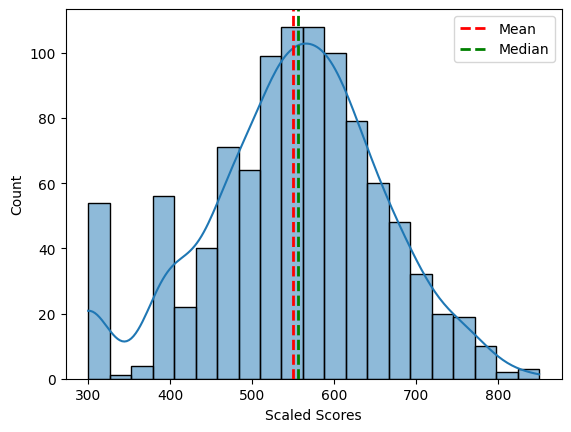

In [53]:
# Calculate mean and median
mean_value = np.mean(scaled_scores)
median_value = np.median(scaled_scores)

# Plot the histogram
sns.histplot(scaled_scores, kde=True)
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label='Median')
plt.xlabel("Scaled Scores")
plt.legend()
plt.show()


In [52]:
scaled_scores.skew()

-0.29551365797224033

In [57]:
# save scaled_scores in excel file
creditscores = pd.DataFrame(combined_weighted_creditscoring["scaled_scores"])

In [59]:
creditscores.to_excel("creditscores.xlsx", index=False)